<a href="https://colab.research.google.com/github/joananana/CAN/blob/main/Exerc%C3%ADcios_C%C3%A1p_8_Integra%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão 1

In [2]:

import numpy as np
from numpy import pi, cos, sin
from scipy import integrate

# Grid voltage:
v = lambda t: (311*sin(377*t))**2

# Int
integration = lambda t: sin(377*t)**2

######## trapezoidal integration ########
# integrate F, from A to B, in N rectangles
def trapezoidal(f, a, b, n):
    h = float(b - a) / n
    s = 0.0
    s += f(a)/2.0
    for i in range(1, n):
        s += f(a + i*h)
    s += f(b)/2.0
    return s * h


print("Trapezoidal:")

integration_result = trapezoidal(integration, 0, 2*pi, 4)
print("Int:",'%.4f' % integration_result,"")

vef = np.sqrt( (1/(2*pi)) * trapezoidal(v, 0, 2*pi, 4))
print("Result:",'%.4f' % vef,"\n")


print("Quad:")

integration_result = integrate.quad(integration, 0, 2*pi)[0]
print("Int:",'%.4f' % integration_result,"")

vef = np.sqrt( (1/(2*pi)) * integrate.quad(v, 0, 2*pi)[0] )
print("Result:",'%.4f' % vef,"\n")


Trapezoidal:
Int: 3.1416 
Result: 219.9102 

Quad:
Int: 3.1416 
Result: 219.9102 



#Questão 2

Coeficients:
         6         5         4         3         2
0.5582 x - 6.648 x + 34.27 x - 100.5 x + 181.6 x - 195.8 x + 100
Fitment: 100.0000 %

Trapezoidal:
N = 90, Pmed: 5.9265 
N = 100, Pmed: 5.9265 

Quad:
Pmed: 5.9263 


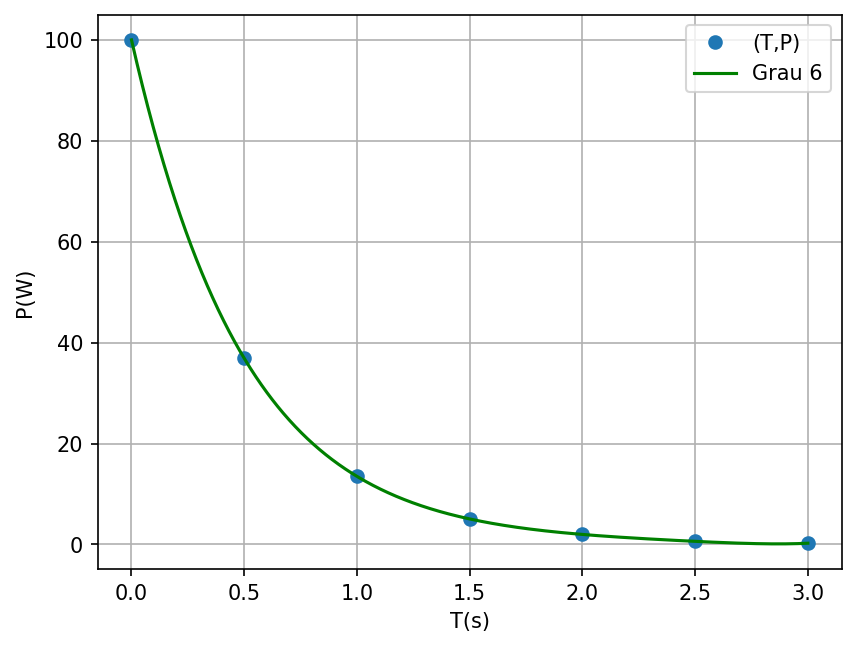

In [1]:

import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, cos, sin
from scipy import integrate



np.x = np.arange(0,3.5,0.5)
np.y = [ 100, 36.9, 13.5, 5.06, 1.99, 0.62, 0.25]
x = np.array(np.x) # transpose is needed to interpret the single
y = np.array(np.y) # vector array as N unidimentional vectors

plt.figure(dpi=150) # graph resolution
plt.grid()  # make some reference lines
plt.plot(x, y, "o", label="(T,P)")
plt.xlabel("T(s)")
plt.ylabel("P(W)")

xx = np.linspace(min(x), max(x), 1000) # from A to B in N steps

###########################################
def r2_fited(y_orig, y_fited):
    y_bar = y_orig.mean()
    ss_tot = ((y_orig-y_bar)**2).sum()
    ss_res = ((y_orig-y_fited)**2).sum()
    return 1 - (ss_res/ss_tot)
###########################################

coef = np.poly1d(np.polyfit(x, y, len(x)-1))  # Last argument is the degree of polynomial
plt.plot(xx,np.polyval(coef,xx),'g', label="Grau 6")
print("Coeficients:\n", coef)
print("Fitment:",'%.4f' % (r2_fited(y,np.polyval(coef,x))*100),"%\n")


######## trapezoidal integration ########
def trapezoidal(f, a, b, n):
    h = float(b - a) / n
    s = 0.0
    s += f(a)/2.0
    for i in range(1, n):
        s += f(a + i*h)
    s += f(b)/2.0
    return s * h
########################################

print("Trapezoidal:")

integration_result = trapezoidal(coef, 1, 2, 90)
print("N = 90, Pmed:",'%.4f' % integration_result,"")

integration_result = trapezoidal(coef, 1, 2, 100)
print("N = 100, Pmed:",'%.4f' % integration_result,"\n")


print("Quad:")

integration_result = integrate.quad(coef, 1, 2)[0]
print("Pmed:",'%.4f' % integration_result,"")

plt.legend()
plt.show()
